In [94]:
# importing library and loading the dataset
import pandas as pd

df = pd.read_csv('dataset.csv')
print(df)

     f1   f2  f3  f4   f5    f6     f7  target
0     6  148  72  35    0  33.6  0.627       1
1     1   85  66  29    0  26.6  0.351       0
2     8  183  64   0    0  23.3  0.672       1
3     1   89  66  23   94  28.1  0.167       0
4     0  137  40  35  168  43.1  2.288       1
..   ..  ...  ..  ..  ...   ...    ...     ...
761   9   89  62   0    0  22.5      e       0
762  10  101  76  48  180     d  0.171       0
763   2  122  70  27    b  36.8   0.34       0
764   c  121  72  23  112  26.2  0.245       0
765   1  126  60   a    0  30.1  0.349       1

[766 rows x 8 columns]


In [95]:
# Getting the first five rows of our dataset
df.head()

,f1,f2,f3,f4,f5,f6,f7,target
0,6,148,72,35,0,33.6,0.627,1
1,1,85,66,29,0,26.6,0.351,0
2,8,183,64,0,0,23.3,0.672,1
3,1,89,66,23,94,28.1,0.167,0
4,0,137,40,35,168,43.1,2.288,1


In [51]:
# getting an idea about the dataset and checking which columns have categorical values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766 entries, 0 to 765
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   f1      766 non-null    object
 1   f2      766 non-null    object
 2   f3      766 non-null    int64 
 3   f4      766 non-null    object
 4   f5      766 non-null    object
 5   f6      766 non-null    object
 6   f7      766 non-null    object
 7   target  766 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 48.0+ KB


In [96]:
columns_with_letters = ['f1','f2','f4','f5','f6','f7']

for val in columns_with_letters:
    df = df[df[val].str.isalpha() == False]

In [53]:
df.shape

(760, 8)

In [54]:
# Preprocessing the dataset
# Here we want to convert categorical values to numerical values 
# For this we import necessory library
# WE are using LabelEncoding
from sklearn.preprocessing import LabelEncoder

In [97]:
# creating an instance for encoding
encoder = LabelEncoder()
# transform data by applying label encoder to categorical variables
for col in df.select_dtypes(include=['object']):
    df[col] = encoder.fit_transform(df[col])

In [56]:
# Checking if all values are numerical or not
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760 entries, 0 to 759
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   f1      760 non-null    int32
 1   f2      760 non-null    int32
 2   f3      760 non-null    int64
 3   f4      760 non-null    int32
 4   f5      760 non-null    int32
 5   f6      760 non-null    int32
 6   f7      760 non-null    int32
 7   target  760 non-null    int64
dtypes: int32(6), int64(2)
memory usage: 35.6 KB


In [98]:
# Here we Scale numerical variables to have zero mean and unit variance
# So we import necessary library
from sklearn.preprocessing import StandardScaler

In [99]:
# creating an instance for standardscaler and fitting the data
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [100]:
# Next step is to split the dataset into training and testing
# For that we import the library
from sklearn.model_selection import train_test_split

In [101]:
data_arr = df.values

In [114]:
# We asign target column to y and other columns to X and split it
y = data_arr[:, 7]
X = data_arr[:, 0:-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=40)

In [103]:
# We get the shape of our training and testing data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(684, 7)
(76, 7)
(684,)
(76,)


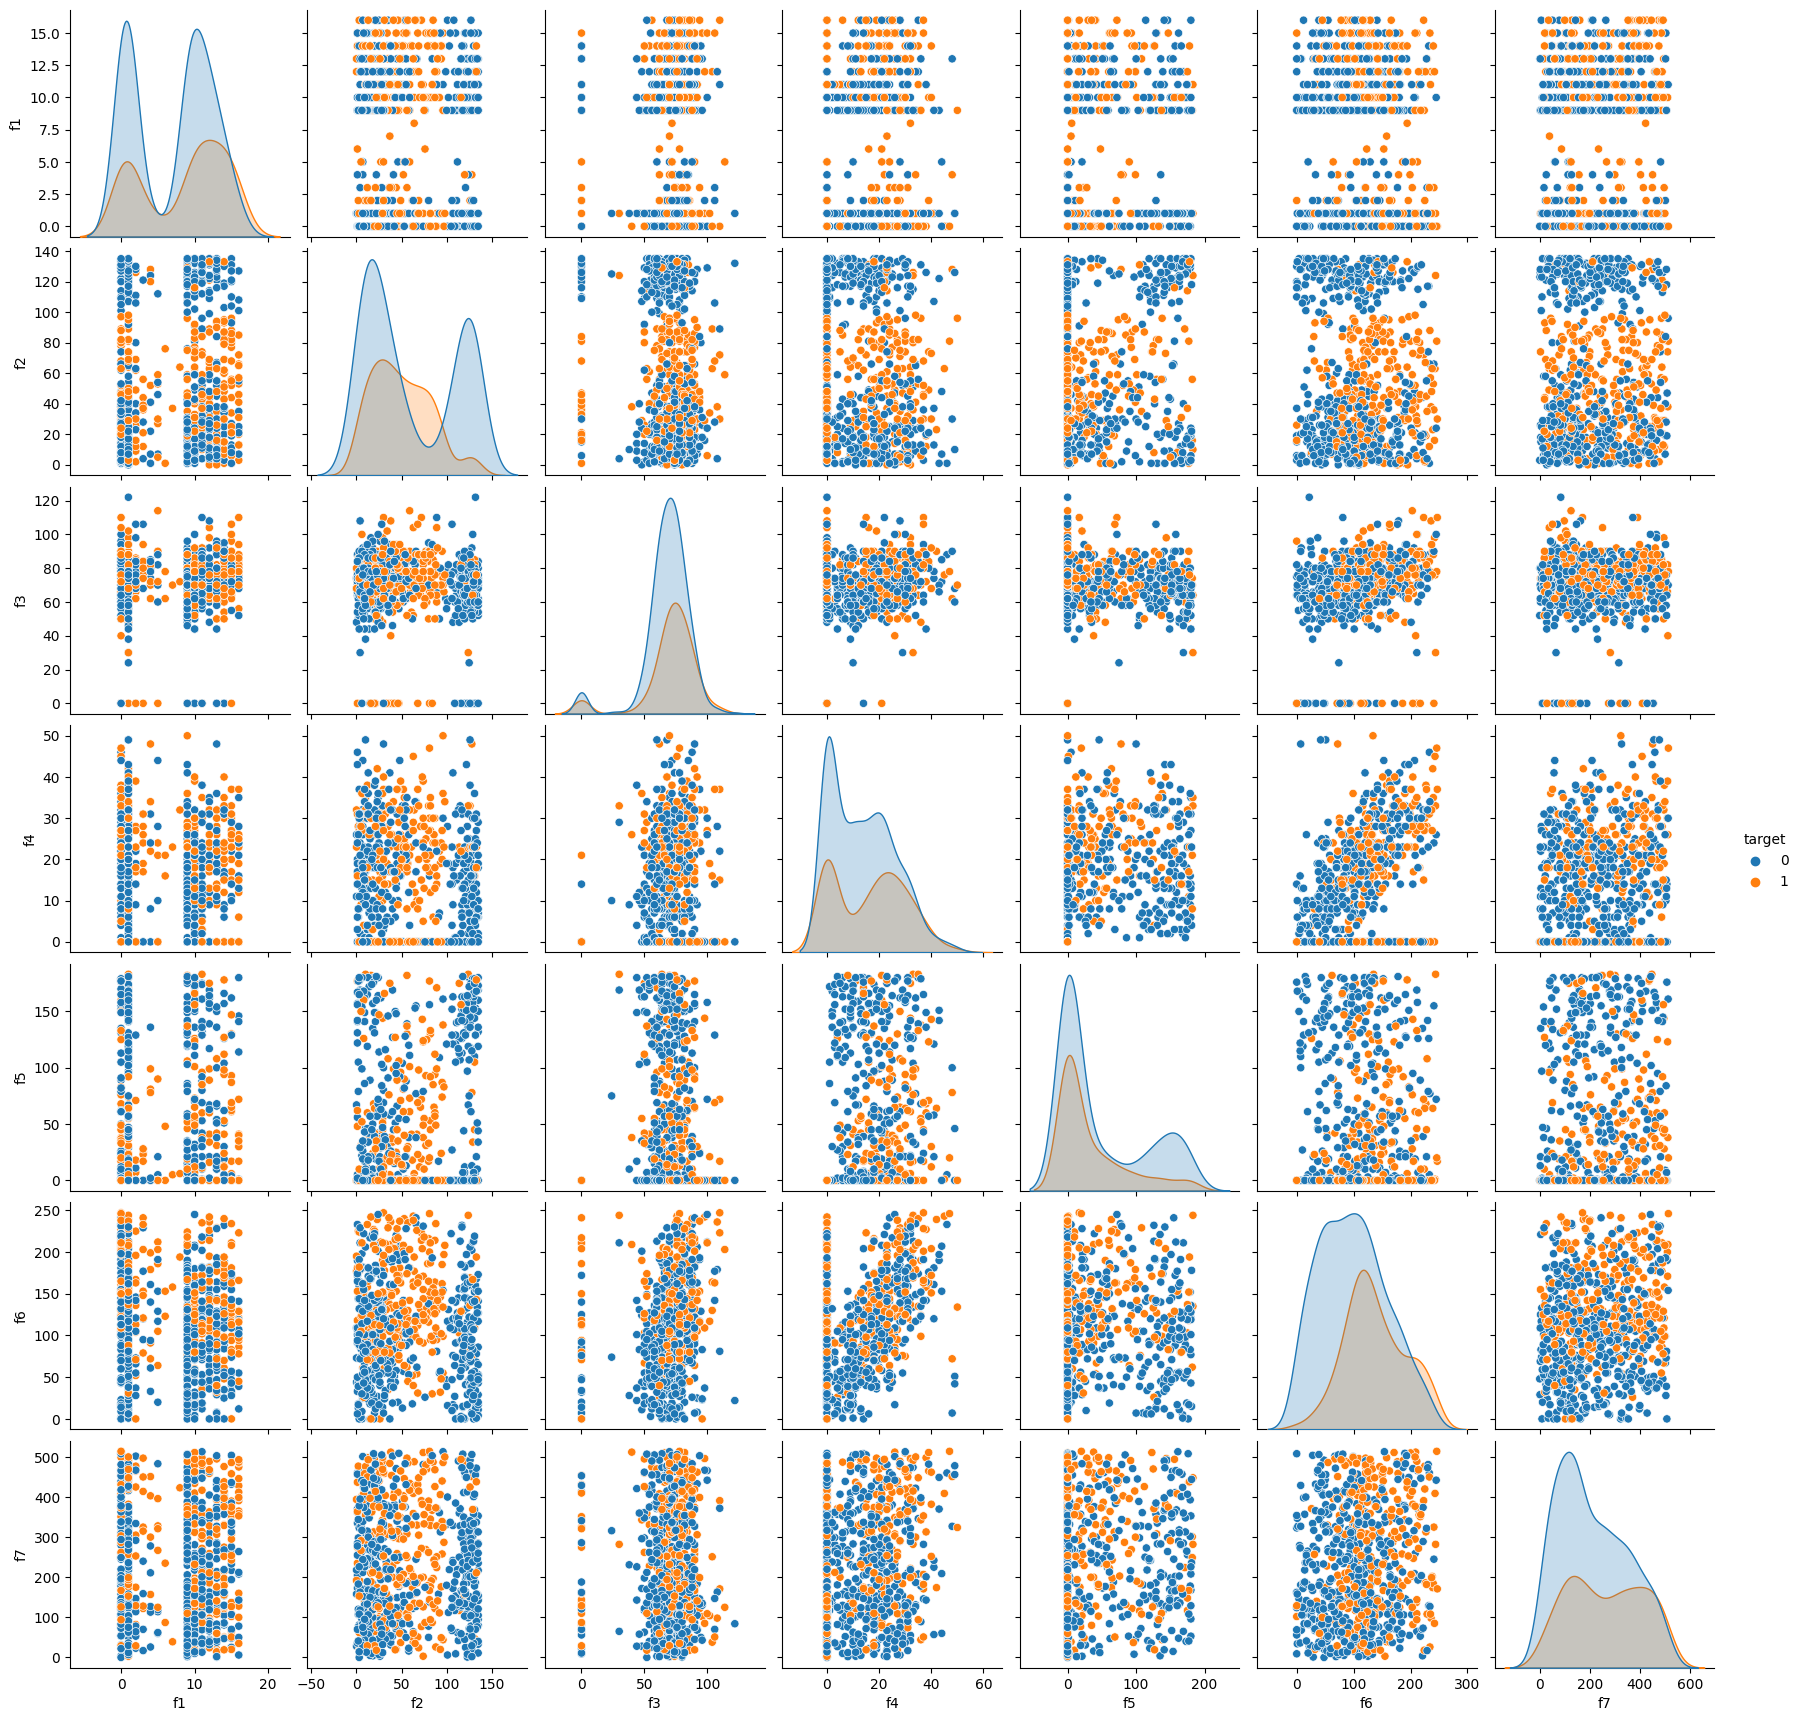

In [63]:
import seaborn as sns
# Create a pairplot
sns.pairplot(df, hue="target")

<Axes: >

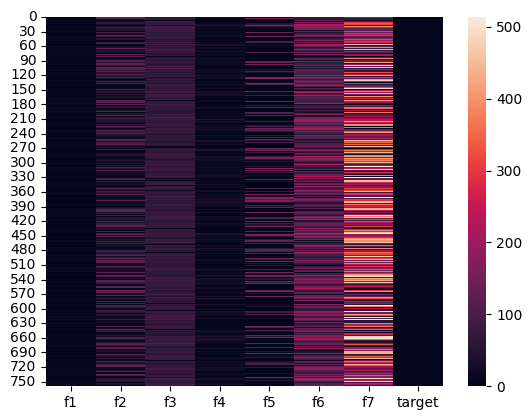

In [122]:
sns.heatmap(df)

<Axes: >

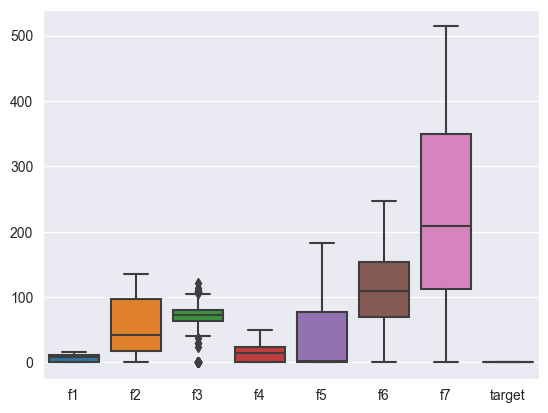

In [200]:
sns.boxplot(df)

Step 3: Defining my Neural Network
1)How many input neurons are there? Ans:- the input neurons to the neural network is a 7.

2)What activation function will you choose? Ans:- the activation function used in the hidden layers of the neural network is ReLU (Rectified Linear Unit).

3)What is the number of hidden layers? Ans:- there are two hidden layers in the neural network.

4)What is the size of each hidden layer? Ans:- both the hidden layers has 64 and 128 neurons respectively.

5)What activation function is used for the hidden and output layer? Ans:- ReLU activation function is used for the hidden layers (first and second linear layers), and sigmoid activation function is used for the output layer (third linear layer).

In [115]:
# DEfining the neural network
# importing libraries
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

In [116]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [196]:
def acc_data(y_true, y_pred):
    count = 0
    for i in range(len(y_true)):
        if y_true[i] != y_pred[i]:
            count+=1
    return ((len(y_pred) - count)/ len(y_pred)) * 100 
    

In [201]:
# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)


# Define the neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(7, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
        )
    
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

# Instantiate the neural network and move it to the device (GPU or CPU)
model = Net().to(device)


# Define the training function
def train(model, X, y, optimizer, criterion, num_epochs):
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i in range(len(X)):
            inputs = torch.FloatTensor(X[i]).unsqueeze(0)
            labels = torch.FloatTensor([y[i]])
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print("Epoch {} loss: {:.4f}".format(epoch+1, running_loss/len(X)))


In [149]:
y = y.reshape(-1, 1)
# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Evaluate the model on the validation set
model.eval()
train(model, X_train, y_train, optimizer, criterion, num_epochs=5)
    
# Evaluate the model on the test set
with torch.no_grad():
    inputs = torch.FloatTensor(X_test)
    labels = torch.FloatTensor(y_test)
    outputs = model(inputs)
    mse = criterion(outputs.squeeze(), labels)
    mae = nn.L1Loss()(outputs.squeeze(), labels)
    accuracy = ((outputs.squeeze() > 0.5) == labels).float().mean()

print("Test MSE: {:.4f}".format(mse))
print("Test MAE: {:.4f}".format(mae))
print("Test accuracy: {:.2f}%".format(accuracy*100))

Epoch 1 loss: 0.1799
Epoch 2 loss: 0.1799
Epoch 3 loss: 0.1793
Epoch 4 loss: 0.1766
Epoch 5 loss: 0.1749
Test MSE: 0.1801
Test MAE: 0.3769
Test accuracy: 78.95%


In [150]:
# Saving the weights of the trained neural network
torch.save(model.state_dict(), "Khushi_Vinay_assignment2_part1.pt")

In [71]:
from sklearn.metrics import confusion_matrix
with torch.no_grad():
    outputs = model(X_test_tensor)
    predicted = torch.round(torch.sigmoid(outputs))
    y_pred = predicted.cpu().numpy().flatten()
    y_true = y_test_tensor.cpu().numpy().flatten()
    cm = confusion_matrix(y_true, y_pred)
    print('Confusion matrix:\n', cm)

Confusion matrix:
 [[ 0 47]
 [ 0 29]]


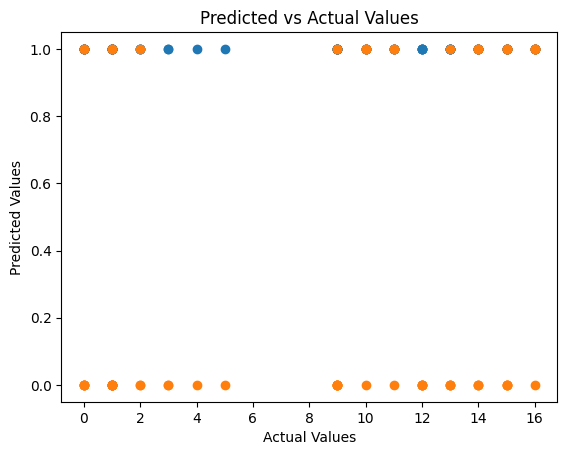

In [72]:
import matplotlib.pyplot as plt
x = np.linspace(0, 10, 152)
# create the scatter plot 
plt.scatter(X_test[:,0], y_pred)
plt.scatter(X_test[:,0], y_true)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")

# display the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(train_losses, label='train')
plt.plot(mse, label='test')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(X_test[:,0], y_pred, label='train')
plt.plot(accuracy, label='test')
plt.legend()
plt.show()

In [179]:
X_test[:,0]

array([ 0, 11, 15, 10,  0,  1, 15,  1, 13, 14, 16,  1,  9,  1, 12, 11, 15,
       12,  1, 14, 16,  1, 13,  0, 10,  1, 14, 14,  2,  1, 15,  1, 12,  9,
       14, 15,  1, 10,  9,  5,  0,  3,  0,  1, 14,  9, 16, 14, 11,  9,  1,
        0,  0,  2, 13, 15,  0, 12, 16,  2, 11, 10,  3, 13,  1, 12, 10, 16,
        9,  9,  1,  4, 13, 15,  9, 15], dtype=int64)

In [ ]:
# Calculate training accuracy
with torch.no_grad():
    inputs = torch.FloatTensor(X_train)
    labels = torch.FloatTensor(y_train)
    outputs = model(inputs)
    y_pred = (outputs.squeeze() > 0.5).float()
    accuracy_train = torch.mean((y_pred == labels).float())

# Plot training and test accuracy on the same plot
plt.subplot(211)
plt.plot(accuracy_train, label='Training Accuracy')
plt.plot(accuracy, label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and testing loss
plt.subplot(212)
plt.plot(train_losses, label='Training Loss')
plt.plot(mse, label='Test Loss')
plt.title('Training and Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Reference: GeeksforGeeks, StackOVerflow, ChatGPT

Hyper parameters Testing.   
DROPOUT 0.4

In [73]:
from torch.nn.modules import dropout
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.flatten = nn.Flatten()
        self.dropout1 = nn.Dropout(0.4)
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(7, 64),
            nn.ReLU(),
            self.dropout1,
            nn.Linear(64, 128),
            nn.ReLU(),
            self.dropout1,
            nn.Linear(128, 64),
            nn.ReLU(),
            self.dropout1,
            nn.Linear(64, 1),
        )

    def forward(self, x):
        x = self.flatten(x)
        x = self.dropout1(x)
        logits = self.linear_relu_stack(x)
        return logits


    model = Net()


# Evaluate the model on the validation set
model.eval()
num_epochs = 5
train(model, X, y, optimizer, criterion, num_epochs)


# Evaluate the model on the test set
with torch.no_grad():
    inputs = torch.FloatTensor(X_test)
    labels = torch.FloatTensor(y_test)
    outputs = model(inputs)
    mse = criterion(outputs.squeeze(), labels)
    mae = nn.L1Loss()(outputs.squeeze(), labels)
    accuracy = ((outputs.squeeze() > 0.7) == labels).float().mean()

print("Test MSE: {:.4f}".format(mse))
print("Test MAE: {:.4f}".format(mae))
print("Test accuracy: {:.2f}%".format(accuracy*100))


C:\Users\Khushi\AppData\Local\Temp\ipykernel_11528\3759343794.py:38: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:248.)
  labels = torch.FloatTensor([y[i]])


Epoch 1 loss: 0.1978
Epoch 2 loss: 0.1931
Epoch 3 loss: 0.1891
Epoch 4 loss: 0.1862
Epoch 5 loss: 0.1830
Test MSE: 0.1708
Test MAE: 0.3798
Test accuracy: 67.11%


In [74]:
# Saving the weights of the trained neural network
torch.save(model.state_dict(), "Khushi_Vinay_assignment2_part2_drop1.pt")

Dropout 0.5

In [75]:
from torch.nn.modules import dropout
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.flatten = nn.Flatten()
        self.dropout1 = nn.Dropout(0.5)
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(7, 128),
            nn.ReLU(),
            self.dropout1,
            nn.Linear(128, 128),
            nn.ReLU(),
            self.dropout1,
            nn.Linear(128, 1),
        )

    def forward(self, x):
        x = self.flatten(x)
        x = self.dropout1(x)
        logits = self.linear_relu_stack(x)
        return logits


    model = Net()
#y = y.reshape(-1, 1)
# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Evaluate the model on the validation set
model.eval()
train(model, X_train, y_train, optimizer, criterion, num_epochs = 5)

# Evaluate the model on the test set
with torch.no_grad():
    inputs = torch.FloatTensor(X_test)
    labels = torch.FloatTensor(y_test)
    outputs = model(inputs)
    mse = criterion(outputs.squeeze(), labels)
    mae = nn.L1Loss()(outputs.squeeze(), labels)
    accuracy = ((outputs.squeeze() > 0.5) == labels).float().mean()

print("Test MSE: {:.4f}".format(mse))
print("Test MAE: {:.4f}".format(mae))
print("Test accuracy: {:.2f}%".format(accuracy*100))



c:\Users\Khushi\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1 loss: 0.1912
Epoch 2 loss: 0.1844
Epoch 3 loss: 0.1806
Epoch 4 loss: 0.1827
Epoch 5 loss: 0.1810
Test MSE: 0.1688
Test MAE: 0.3668
Test accuracy: 77.63%


In [76]:
# Saving the weights of the trained neural network
torch.save(model.state_dict(), "Khushi_Vinay_assignment2_part2_drop2.pt")

Dropout 0.3

In [172]:
from torch.nn.modules import dropout
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.flatten = nn.Flatten()
        self.dropout1 = nn.Dropout(0.3)
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(7, 128),
            nn.ReLU(),
            self.dropout1,
            nn.Linear(128, 128),
            nn.ReLU(),
            self.dropout1,
            nn.Linear(128, 2),
        )

    def forward(self, x):
        x = self.flatten(x)
        x = self.dropout1(x)
        logits = self.linear_relu_stack(x)
        return logits


    model = Net()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Evaluate the model on the validation set
model.eval()
train(model, X_train, y_train, optimizer, criterion, num_epochs = 5)

# Evaluate the model on the test set
with torch.no_grad():
    inputs = torch.FloatTensor(X_test)
    labels = torch.FloatTensor(y_test)
    outputs = model(inputs)
    mse = criterion(outputs.squeeze(), labels)
    mae = nn.L1Loss()(outputs.squeeze(), labels)
    accuracy = ((outputs.squeeze() > 0.5) == labels).float().mean()

print("Test MSE: {:.4f}".format(mse))
print("Test MAE: {:.4f}".format(mae))
print("Test accuracy: {:.2f}%".format(accuracy*100))



Epoch 1 loss: 0.1881
Epoch 2 loss: 0.1859
Epoch 3 loss: 0.1816
Epoch 4 loss: 0.1863
Epoch 5 loss: 0.1779
Test MSE: 0.1770
Test MAE: 0.3705
Test accuracy: 76.32%


In [78]:
# Saving the weights of the trained neural network
torch.save(model.state_dict(), "Khushi_Vinay_assignment2_part2_drop3.pt")

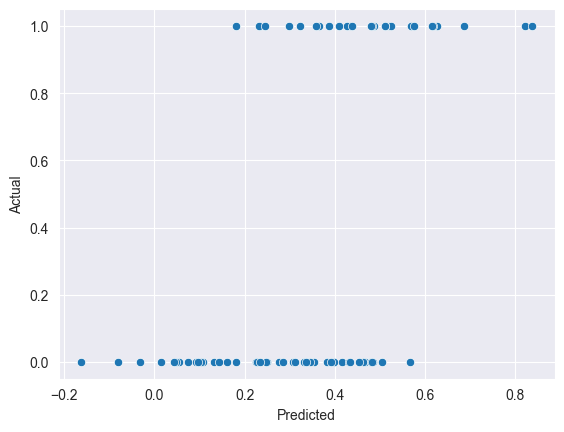

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate the model on the test set
with torch.no_grad():
    inputs = torch.FloatTensor(X_test)
    labels = torch.FloatTensor(y_test)
    outputs = model(inputs)

# Plot predicted vs actual values
sns.scatterplot(x=outputs.squeeze(), y=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

So the best setup we got from 12 use case was:-

1)Optimizer - optim.Adam

2)Initializer - 0.001

3)Activation function - sigmoid

4)Dropout - 0.5

In [79]:
import torch
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold


# where k = 6
kf = KFold(n_splits=6)

# create lists to store accuracies for each fold
accur_test_kfold = []
accur_train_kfold = []

# loop over the k folds
for train_index, test_index in kf.split(X_train_tensor):
    # split the data into training and testing sets
    X_train, X_test = X_train_tensor[train_index], X_train_tensor[test_index]
    y_train, y_test = y_train_tensor[train_index], y_train_tensor[test_index]

    # initialize the model, optimizer, and loss function
    model1 = Net()
    optimizer = torch.optim.Adam(model1.parameters(), lr=0.0123)
    criterion = nn.MSELoss()

    # train the model for a specified number of epochs
    num_epochs = 50
    batch_size = 32
    for epoch in range(num_epochs):
        for i in range(0, len(X_train), batch_size):
            batch_features = X_train[i:i+batch_size]
            batch_labels = y_train[i:i+batch_size].float()
            optimizer.zero_grad()
            outputs = model1(batch_features)
            loss = criterion(outputs, batch_labels)

            loss.backward()
            optimizer.step()

        with torch.no_grad():
            outputs_train = model1(X_train)
            predicted_train = torch.round(torch.sigmoid(outputs_train))
            correct_train = (predicted_train == y_train).sum().item()
            total_train = y_train.size(0)
            accur_train_kfold.append(correct_train / total_train * 100)

        with torch.no_grad():
            outputs = model1(X_test)
            predicted = torch.round(torch.sigmoid(outputs))
            correct = (predicted == y_test).sum().item()
            total = y_test.size(0)
            accur_test_kfold.append(correct / total * 100)

# calculate and print the average accuracies over all folds
avg_train_accuracy = sum(accur_train_kfold) / len(accur_train_kfold)
avg_test_accuracy = sum(accur_test_kfold) / len(accur_test_kfold)
print('Average accuracy for training: {:.2f}%'.format(avg_train_accuracy))
print('Average accuracy for testing: {:.2f}%'.format(avg_test_accuracy))


c:\Users\Khushi\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([32, 1])) that is different to the input size (torch.Size([32, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\Khushi\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([26, 1])) that is different to the input size (torch.Size([26, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Average accuracy for training: 73.11%
Average accuracy for testing: 73.53%


In [80]:
# Saving the weights of the trained neural network
torch.save(model.state_dict(), "Khushi_Vinay_assignment2_part2.pt")

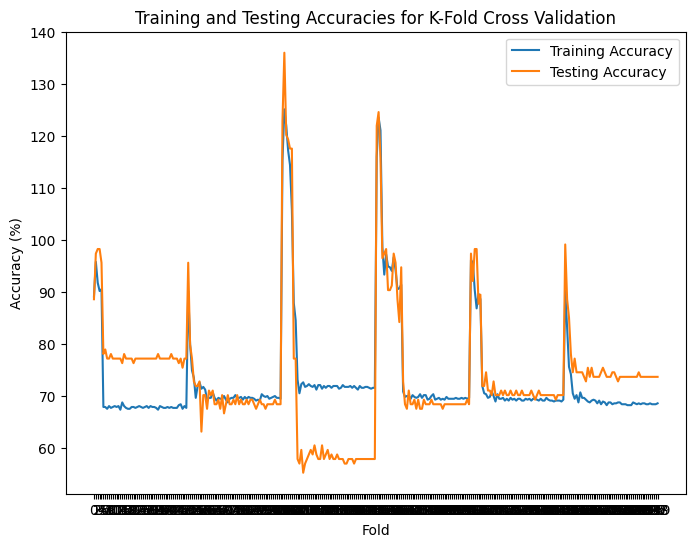

In [81]:
import matplotlib.pyplot as plt

# plot that shows the training and testing accuracies over each fold
plt.figure(figsize=(8, 6))
plt.plot(range(len(accur_train_kfold)), accur_train_kfold, label='Training Accuracy')
plt.plot(range(len(accur_test_kfold)), accur_test_kfold, label='Testing Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy (%)')
plt.xticks(range(len(accur_train_kfold)))
plt.title('Training and Testing Accuracies for K-Fold Cross Validation')
plt.legend()
plt.show()


In [82]:
# Define the training function with early stoppin
def train(model, X_train, y_train, X_val, y_val, optimizer, criterion, num_epochs, patience):
    best_val_loss = float('inf')
    best_model = None
    no_improvement_count = 0
    
    epoch_losses = []
    val_losses = []
    
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i in range(len(X_train)):
            inputs = X_train[i].unsqueeze(0).to(device)
            labels = y_train[i].unsqueeze(0).to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        
        # Calculate the validation loss
        with torch.no_grad():
            val_inputs = X_val.to(device)
            val_labels = y_val.to(device)
            val_outputs = model(val_inputs)
            val_loss = criterion(val_outputs, val_labels)
        
        # Check for early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model = model.state_dict()
            no_improvement_count = 0
        else:
            no_improvement_count += 1
            if no_improvement_count == patience:
                break
        
        epoch_loss = running_loss/len(X_train)
        epoch_losses.append(epoch_loss)
        val_losses.append(val_loss)
        print("Epoch {} loss: {:.4f} validation loss: {:.4f}".format(epoch+1, epoch_loss, val_loss))
    
    # Load the best model parameters
    model.load_state_dict(best_model)
    
    return model, epoch_losses, val_losses

# Define the loss function and optimizer
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model with early stopping
model, epoch_losses, val_losses = train(model, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, optimizer, criterion, num_epochs=100, patience=10)

# Evaluate the model on the test set
with torch.no_grad():
    inputs = X_test_tensor.to(device)
    labels = y_test_tensor.to(device)
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    accuracy = ((outputs > 0.5) == labels).float().mean()

print("Test loss: {:.4f}".format(loss))
print("Test accuracy: {:.2f}%".format(accuracy*100))


Epoch 1 loss: 0.1757 validation loss: 0.1777
Epoch 2 loss: 0.1712 validation loss: 0.1757
Epoch 3 loss: 0.1684 validation loss: 0.1709
Epoch 4 loss: 0.1667 validation loss: 0.1749
Epoch 5 loss: 0.1657 validation loss: 0.1829
Epoch 6 loss: 0.1668 validation loss: 0.1783
Epoch 7 loss: 0.1607 validation loss: 0.1705
Epoch 8 loss: 0.1635 validation loss: 0.1714
Epoch 9 loss: 0.1557 validation loss: 0.1703
Epoch 10 loss: 0.1654 validation loss: 0.1791
Epoch 11 loss: 0.1593 validation loss: 0.1815
Epoch 12 loss: 0.1674 validation loss: 0.1717
Epoch 13 loss: 0.1648 validation loss: 0.1727
Epoch 14 loss: 0.1593 validation loss: 0.1739
Epoch 15 loss: 0.1593 validation loss: 0.1749
Epoch 16 loss: 0.1531 validation loss: 0.1708
Epoch 17 loss: 0.1548 validation loss: 0.1634
Epoch 18 loss: 0.1566 validation loss: 0.1693
Epoch 19 loss: 0.1543 validation loss: 0.1670
Epoch 20 loss: 0.1496 validation loss: 0.1582
Epoch 21 loss: 0.1513 validation loss: 0.1706
Epoch 22 loss: 0.1532 validation loss: 0.17

In [83]:
# Saving the weights of the trained neural network
torch.save(model.state_dict(), "Khushi_Vinay_assignment2_part2_earlystopping.pt")

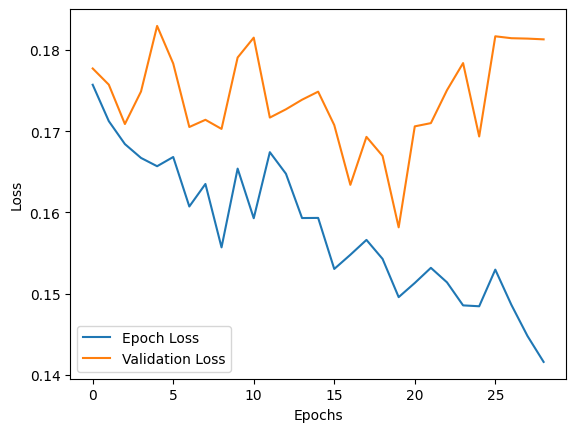

In [84]:
import matplotlib.pyplot as plt

# Plot the training and testing accuracy
plt.plot(epoch_losses, label='Epoch Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [85]:
# Define the training function
def train(model, X_train, y_train, X_test, y_test, optimizer, criterion, num_epochs):
    best_test_accuracy = 0.0
    best_train_accuracy = 0.0
    best_test_epoch = 0
    best_train_epoch = 0
    
    epoch_train_accuracies = []
    epoch_test_accuracies = []
    
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        for i in range(len(X_train)):
            inputs = X_train[i].unsqueeze(0).to(device)
            labels = y_train[i].unsqueeze(0).to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            total_train += 1
            correct_train += ((outputs > 0.5) == labels).sum().item()
        
        train_accuracy = correct_train / total_train
        epoch_train_accuracies.append(train_accuracy)
        
        correct_test = 0
        total_test = 0
        with torch.no_grad():
            for i in range(len(X_test)):
                inputs = X_test[i].unsqueeze(0).to(device)
                labels = y_test[i].unsqueeze(0).to(device)
                outputs = model(inputs)
                correct_test += ((outputs > 0.5) == labels).sum().item()
                total_test += 1
        
        test_accuracy = correct_test / total_test
        epoch_test_accuracies.append(test_accuracy)
        
        if train_accuracy > best_train_accuracy:
            best_train_accuracy = train_accuracy
            best_train_epoch = epoch + 1
        
        if test_accuracy > best_test_accuracy:
            best_test_accuracy = test_accuracy
            best_test_epoch = epoch + 1
    return model, epoch_train_accuracies, epoch_test_accuracies, best_train_epoch, best_test_epoch, best_train_accuracy, best_test_accuracy

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model
model, epoch_train_accuracies, epoch_test_accuracies, best_train_epoch, best_test_epoch, best_train_accuracy, best_test_accuracy = train(model, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, optimizer, criterion, num_epochs=100)

# Evaluate the model on the test set
with torch.no_grad():
    inputs = X_test_tensor.to(device)
    labels = y_test_tensor.to(device)
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    accuracy = ((outputs > 0.5) == labels).float().mean()

print("Test loss: {:.4f}".format(loss))
print("Test accuracy: {:.2f}%".format(accuracy*100))

print("Epoch {} with highest training accuracy: {}%, Training accuracy: {:.2f}%".format(epoch, best_train_epoch, best_train_accuracy*100))
print("Epoch {} with highest testing accuracy: {}%, Testing accuracy: {:.2f}%".format(epoch, best_test_epoch, best_test_accuracy*100))


Test loss: 0.2230
Test accuracy: 73.68%
Epoch 49 with highest training accuracy: 92%, Training accuracy: 90.50%
Epoch 49 with highest testing accuracy: 6%, Testing accuracy: 80.26%


In [86]:
# Saving the weights of the trained neural network
torch.save(model.state_dict(), "Khushi_Vinay_assignment2_part2_learningrate.pt")

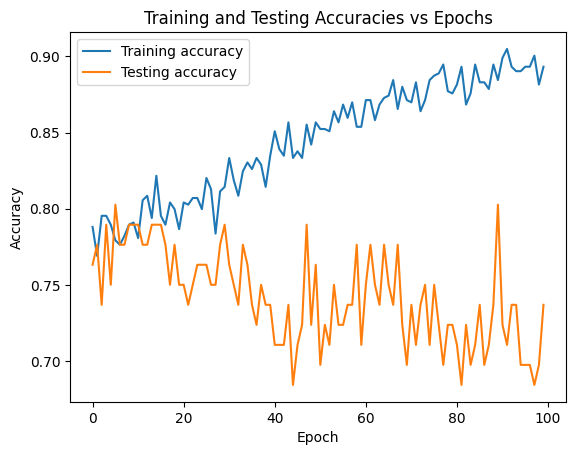

In [87]:
# Plot the accuracy graphs
plt.plot(epoch_train_accuracies, label='Training accuracy')
plt.plot(epoch_test_accuracies, label='Testing accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracies vs Epochs')
plt.legend()
plt.show()

In [88]:
# Define the neural network architecture with batch normalization
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_bn_relu_stack = nn.Sequential(
            nn.Linear(7, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Linear(64, 1),
        )
    
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_bn_relu_stack(x)
        return logits

# Instantiate the neural network and move it to the device (GPU or CPU)
model = Net().to(device)


# Define the training function
def train(model, X, y, optimizer, criterion, num_epochs):
    train_loss = []
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i in range(len(X)):
            inputs = torch.FloatTensor(X[i]).unsqueeze(0)
            labels = torch.FloatTensor([y[i]])
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        epoch_loss = running_loss/len(X)
        train_loss.append(epoch_loss)
        print("Epoch {} loss: {:.4f}".format(epoch+1, epoch_loss))

    return train_loss

y = y.reshape(-1, 1)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model and record the training loss
model.eval()
train_loss = train(model, X_train, y_train, optimizer, criterion, num_epochs=5)

# Evaluate the model on the test set
with torch.no_grad():
    inputs = torch.FloatTensor(X_test)
    labels = torch.FloatTensor(y_test)
    outputs = model(inputs)
    mse = criterion(outputs.squeeze(), labels)
    mae = nn.L1Loss()(outputs.squeeze(), labels)
    accuracy = ((outputs.squeeze() > 0.5) == labels).float().mean()

print("Test MSE: {:.4f}".format(mse))
print("Test MAE: {:.4f}".format(mae))
print("Test accuracy: {:.2f}%".format(accuracy*100))


Epoch 1 loss: 0.7869
Epoch 2 loss: 0.2609
Epoch 3 loss: 0.2291
Epoch 4 loss: 0.2118
Epoch 5 loss: 0.2036
Test MSE: 0.2658
Test MAE: 0.4711
Test accuracy: 55.54%


c:\Users\Khushi\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([114, 1])) that is different to the input size (torch.Size([114])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\Khushi\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\loss.py:101: UserWarning: Using a target size (torch.Size([114, 1])) that is different to the input size (torch.Size([114])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


In [89]:
# Saving the weights of the trained neural network
torch.save(model.state_dict(), "Khushi_Vinay_assignment2_part2_batchnorm.pt")

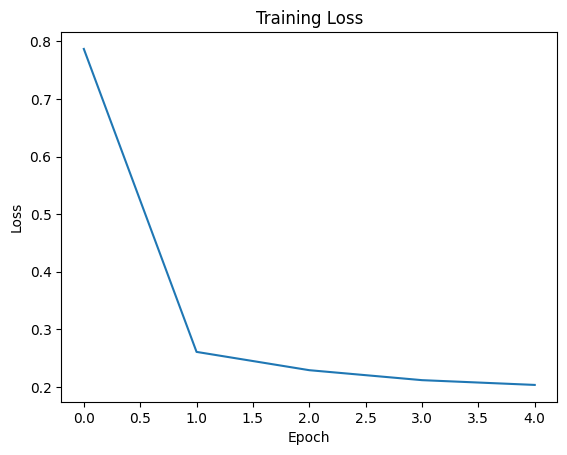

In [90]:

# Plot the training loss over epochs
plt.plot(train_loss)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

